In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host="127.0.0.1",
                   username="root",
                   password="june30anuupadhyay",
                   database="ecommerce")

cur = db.cursor()



## List all unique cities where customers are located.

In [31]:
query="""select distinct customer_city from customers """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


##  Count the number of orders placed in 2017.

In [5]:
query="""select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 315707)

## Find the total sales per category.

In [22]:
query="""select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category","Sales"])
df


,Category,Sales
0,PERFUMERY,8.867927e+07
1,FURNITURE DECORATION,2.502809e+08
2,TELEPHONY,8.520436e+07
3,BED TABLE BATH,2.996969e+08
4,AUTOMOTIVE,1.491515e+08
...,...,...
69,CDS MUSIC DVDS,2.099002e+05
70,LA CUISINE,5.098678e+05
71,FASHION CHILDREN'S CLOTHING,1.374922e+05
72,PC GAMER,3.805252e+05


## Calculate the percentage of orders that were paid in installments.

In [30]:
query="""select (sum(case when payment_installments >=1 then 1 
else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is" ,data[0][0]


('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

## Count the number of customers from each state.

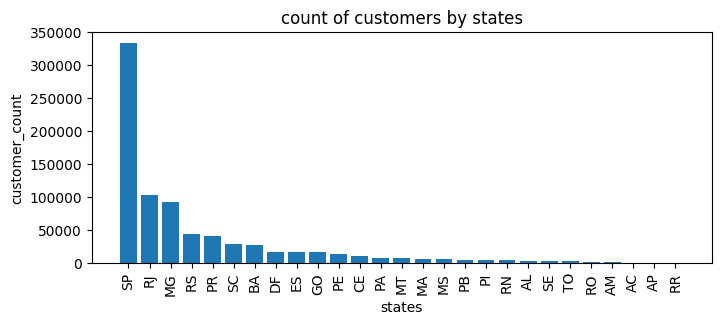

In [33]:
query="""select customer_state , count(customer_id)
from customers group by customer_state"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["state","customer_count"])
df=df.sort_values(by = "customer_count",ascending=False)

plt.figure(figsize=(8,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of customers by states")
plt.show()

## intermediate queries

## Calculate the number of orders per month in 2018.

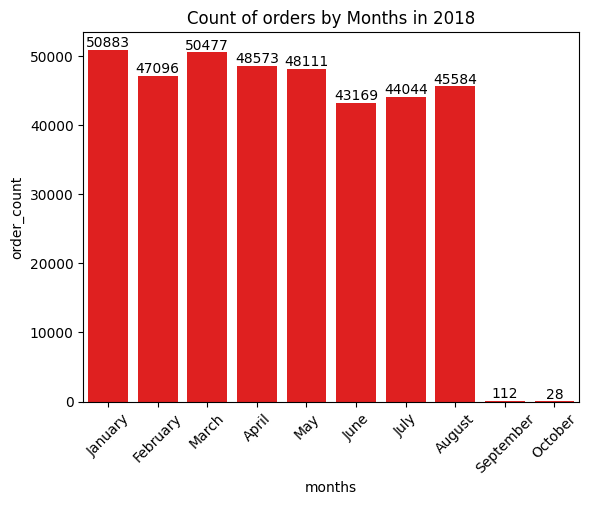

In [22]:
query="""select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months"""
cur.execute(query)
data = cur.fetchall()
df =pd.DataFrame( data, columns=["months","order_count"])
o =["January","February","March","April","May","June","July","August","September","October"]

ax=sns.barplot(x = df["months"],y = df["order_count"], data = df, order = o,color="red")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of orders by Months in 2018")
plt.show()



In [27]:
## Find the average number of products per order, grouped by customer city.

In [25]:
query="""with count_per_order as
(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2)average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc
;
"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns =["customer city","average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,245.00
1,celso ramos,227.50
2,datas,210.00
3,candido godoi,210.00
4,matias olimpio,175.00
5,cidelandia,140.00
6,curralinho,140.00
7,picarra,140.00
8,morro de sao paulo,140.00
9,teixeira soares,140.00


In [59]:
##  Calculate the percentage of total revenue contributed by each product category.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host="127.0.0.1",
                   username="root",
                   password="june30anuupadhyay",
                   database="ecommerce")

cur = db.cursor()

query = """select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments)*100,2) sales_percentage 
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
order by sales_percentage desc """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns =["category","percentage distribution"])
df.head(5)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'from products join order_items
on products.product_id = order_items.product_id
j' at line 3

In [ ]:
## Identify the correlation between product price and the
## number of times a product has been purchased.

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host="127.0.0.1",
                   username="root",
                   password="june30anuupadhyay",
                   database="ecommerce")

cur = db.cursor()

query="""select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns =["category","order_count","price"])
arr1=df["order_count"]
arr2=df["price"]

a=np.corrcoef([arr1,arr2])
print("Identify the correlation between product price and the number of times a product has been purchased is ",a[0][-1])

Identify the correlation between product price and the number of times a product has been purchased is  -0.10631514167157562


## Calculate the total revenue generated by each seller, and rank them by revenue.

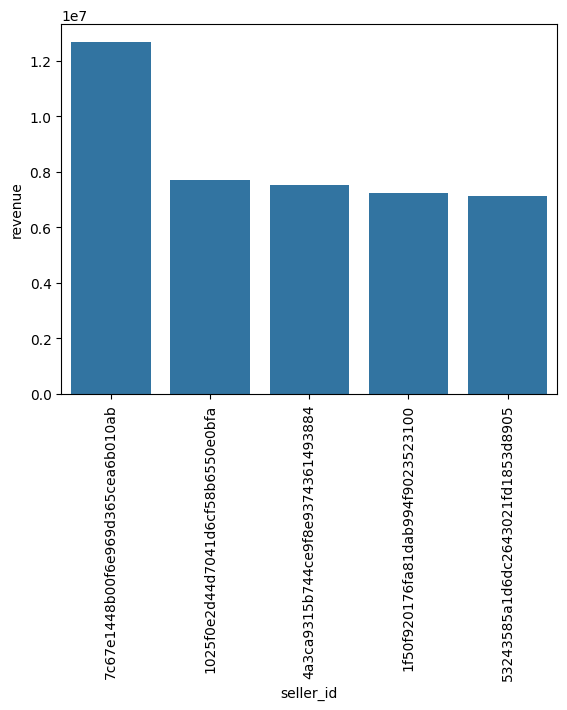

In [63]:

query=""" select * ,dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id,sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head()
sns.barplot(x="seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
plt.show()

## Advanced queries

## Calculate the moving average of order values for each customer over their order history.

In [ ]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host="127.0.0.1",
                   username="root",
                   password="june30anuupadhyay",
                   database="ecommerce")

cur = db.cursor()



query="""select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["customer_id","order_purchase_timestamp","payment","mov_avg"])
df=df.head()

## Calculate the cumulative sales per month for each year.

In [7]:
query=""" select years, months, payment, sum(payment)
over(order by years,months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years,months order by years,months) as a"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,8828.40,8.828400e+03
1,2016,10,2068166.80,2.076995e+06
2,2016,12,686.70,2.077682e+06
3,2017,1,4847081.40,6.924763e+06
4,2017,2,10216780.33,1.714154e+07
5,2017,3,15745225.98,3.288677e+07
6,2017,4,14622581.03,4.750935e+07
7,2017,5,20752158.70,6.826151e+07
8,2017,6,17894673.31,8.615618e+07
9,2017,7,20733402.18,1.068896e+08


## Calculate the year-over-year growth rate of total sales.

In [8]:
query="""with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)
select years,((payment-lag(payment,1) over(order by years))/lag(payment,1)over(order by years))*100 from a
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns = ["years","yoy %growth"])
df



,years,yoy %growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


## Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [4]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(host="127.0.0.1",
                   username="root",
                   password="june30anuupadhyay",
                   database="ecommerce")

cur = db.cursor()





query="""with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),
b as (select a.customer_id,count(distinct orders.order_purchase_timestamp)next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order, interval 6 month)
group by a.customer_id)
select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()
data



[(None,)]

In [ ]:
since we have no repeated customers that's why we get null values

##  Identify the top 3 customers who spent the most money in each year.

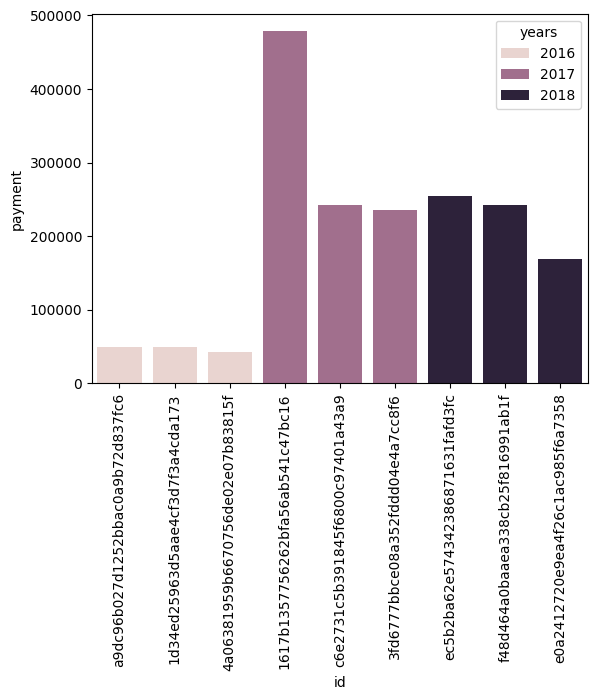

In [12]:
query = """ select years,customer_id,payment,d_rank
from 
(select year  (orders.order_purchase_timestamp)years,
orders.customer_id,
sum(payments.payment_value)payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by  year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3 ;"""

cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns = ["years","id","payment","rank"])
sns.barplot(x="id",y="payment",data=df,hue="years")
plt.xticks(rotation=90)
plt.show()